In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
#reading csv file
df = pd.read_csv('customers.csv')
df.head()
print(df.shape)
print(df.CustomerID.nunique())
#since CUstomerID is unique value it will be dropped to make clustering easier
df2 = df.drop(["CustomerID"],axis=1)

(200, 5)
200


Make some explanatory data analysis and data visualization (plots) you find suitable.

<Figure size 1500x600 with 0 Axes>

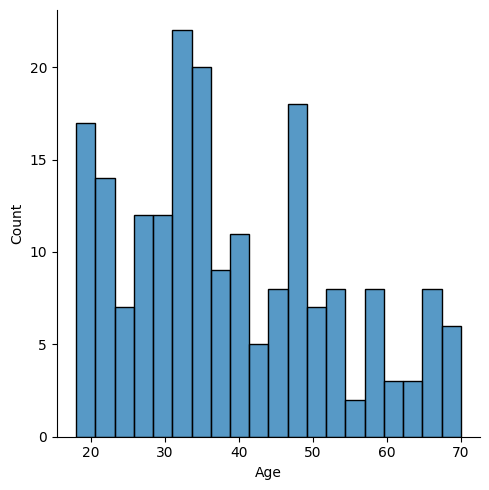

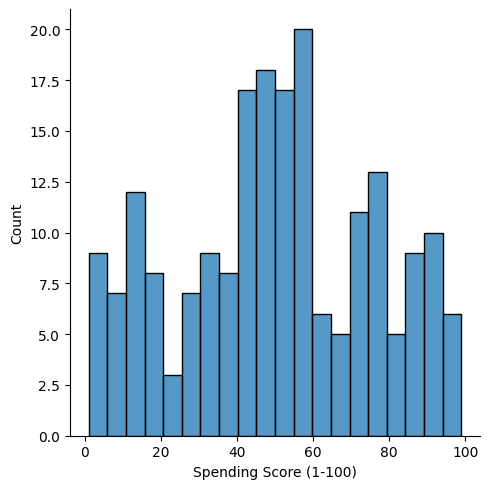

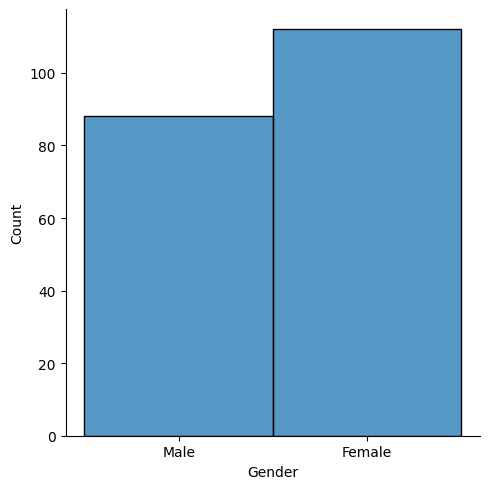

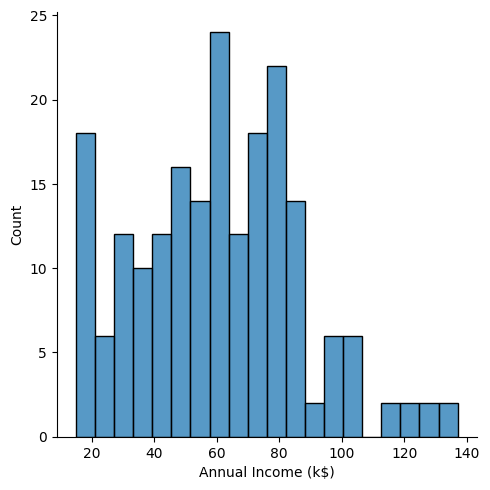

In [5]:
plt.figure(1, figsize=(15,6))
n=0
for i in {"Age", "Annual Income (k$)","Spending Score (1-100)","Gender"}:
 plt.subplots_adjust(hspace=0.5,wspace=0.5)
 sns.displot(df2[i], bins=20)
plt.show ()

In [6]:
df2.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Looking at the graphs and numbers above:

. Average age is 38

. Number of female customers are higher than male

. most income is : 60k , 80k and 20k

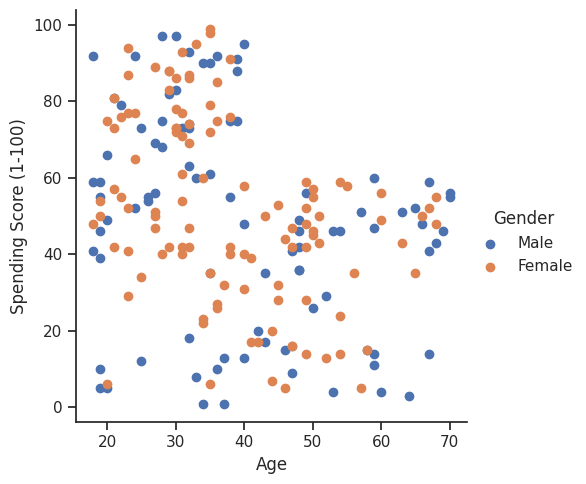

In [7]:
sns.set(style="ticks")
g = sns.FacetGrid(df2, hue="Gender", height=5)
g.map(plt.scatter, "Age", "Spending Score (1-100)")
g.add_legend()

plt.show()

Looking at the above Scatterplot graph:

All of spending scores above 60 comes from ages below 40


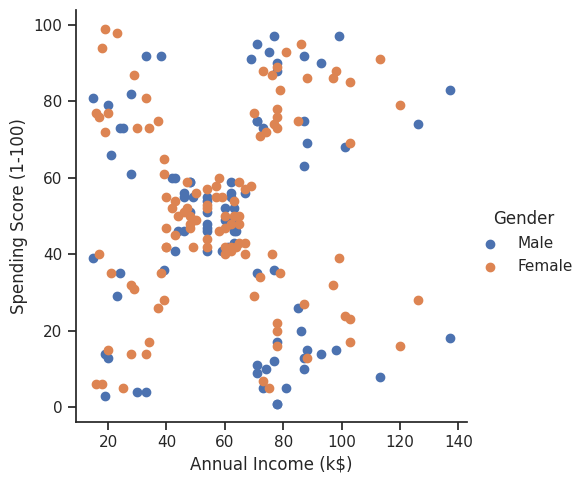

In [8]:
sns.set(style="ticks")
g = sns.FacetGrid(df2, hue="Gender", height=5)
g.map(plt.scatter, "Annual Income (k$)", "Spending Score (1-100)")
g.add_legend()

plt.show()

Average annual income(40-70) has average spending scores(40-60) higher and lower income vary on the spending scores

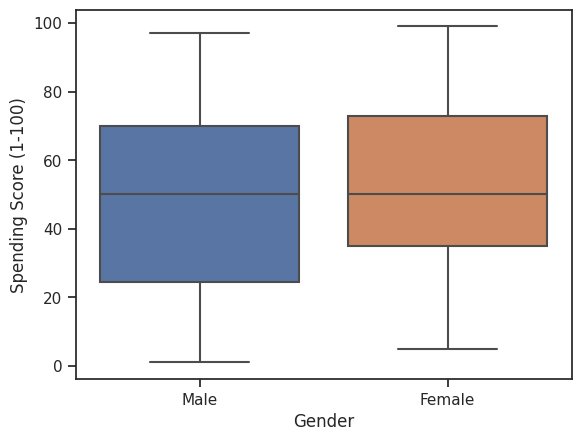

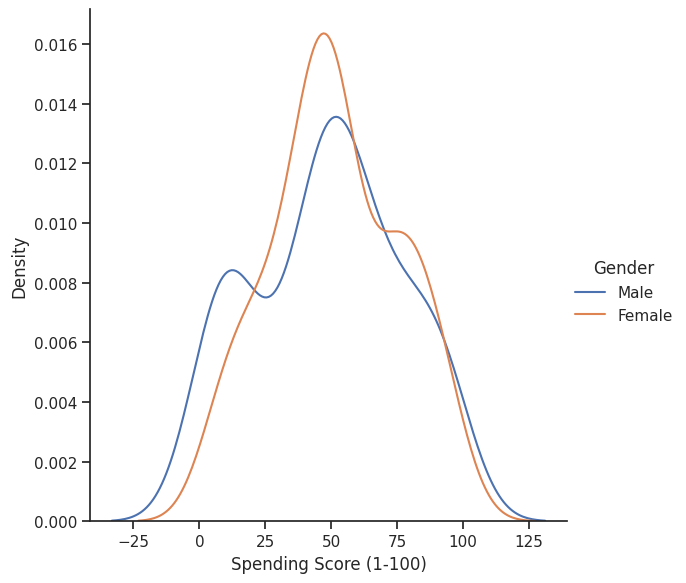

In [9]:
sns.set(style="ticks")
sns.boxplot(x="Gender", y="Spending Score (1-100)", data=df2)

g = sns.FacetGrid(df2, hue="Gender", height=6)
g.map(sns.kdeplot, "Spending Score (1-100)")
g.add_legend()

plt.show()

 -> Gender does not affect the spending score with the average being nearly equal however female customers are more concentrated and slightly higher

Thus the clustering will be according to age and average income

K MEANS: Age and spending scores

first we find the optimal number of clusters using elbow method

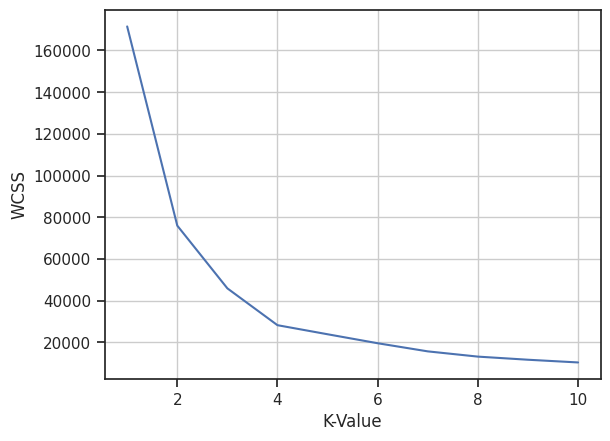

In [10]:
X1=df2.loc[:, ["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

plt.grid()
plt.plot(range(1,11),wcss)
plt.xlabel("K-Value")
plt.ylabel("WCSS")
plt.show()

From the graph above the optimal number for K is 4


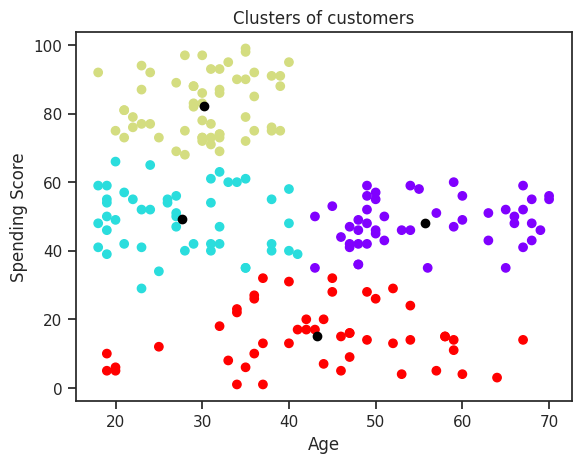

In [11]:
kmeans = KMeans(n_clusters=4)

clusters=kmeans.fit_predict(X1)

plt.scatter(X1[:,0],X1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title("Clusters of customers")
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.show()

**K MEANS: Income and spending scores**

first we find the optimal number of clusters using elbow method

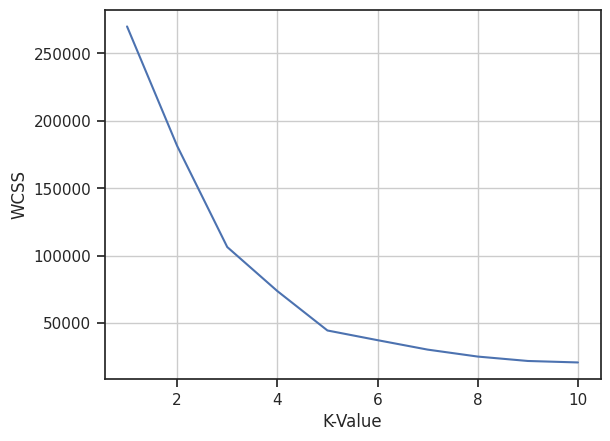

In [12]:
X2=df2.loc[:, ["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X2)
  wcss.append(kmeans.inertia_)

plt.grid()
plt.plot(range(1,11),wcss)
plt.xlabel("K-Value")
plt.ylabel("WCSS")
plt.show()

From graph above optimal K is 5


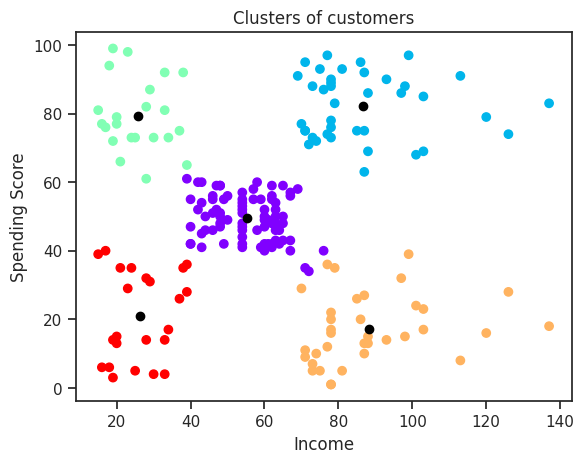

In [13]:
kmeans = KMeans(n_clusters=5)

clusters=kmeans.fit_predict(X2)

plt.scatter(X2[:,0],X2[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.title("Clusters of customers")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.show()